In [5]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain.chains.retrieval import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain import hub
from pprint import pprint

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()



True

In [58]:
# file_path = "./course_material/COMP228_Java_Programming/Week6.F2020.pdf"
# loader = PyPDFLoader(file_path=file_path)
# document = loader.load()
# pprint(document)

from langchain_community.document_loaders import DirectoryLoader
folder_path = "./course_material/COMP228_Java_Programming/"

loader = DirectoryLoader(folder_path, glob="*.pdf", loader_cls=PyPDFLoader,  show_progress=True)
document = loader.load()
len(document)


100%|██████████| 11/11 [00:09<00:00,  1.19it/s]


536

In [59]:
print(document)

[Document(metadata={'source': 'course_material\\COMP228_Java_Programming\\Week10F2020.pdf', 'page': 0}, page_content='Java Programming\nAdvanced Data \nAccess with JDBC'), Document(metadata={'source': 'course_material\\COMP228_Java_Programming\\Week10F2020.pdf', 'page': 1}, page_content='Review of Lecture 9\n⚫ Exception Handling:\n– Exceptions are \nexceptional events that \ndisrupt the normal flow of a \nprogram\n– Java Exception model –\ntermination:\n⚫ The block that causes \nthe exception expires.\n⚫ try block:\n– Code that may generate \nexceptions\nJava Programming2\n⚫ catch block\n– To handle exceptions\n– Takes an Exception object \nas argument\n⚫ finally block\n– Executes always – clean up \noperations\n⚫ throws clause:\n– Indicates exceptions thrown \nby a method\n⚫ throw statement:\n– To throw an exception'), Document(metadata={'source': 'course_material\\COMP228_Java_Programming\\Week10F2020.pdf', 'page': 2}, page_content='Review of Lecture 9\nJava Programming3\n⚫ Checked e

### Get the set of titles for summaries

In [79]:
set_of_titles = set([document[i].page_content.split("\n")[0] for i in range(len(document))])



In [81]:
print(set_of_titles)

{'JdbcRowSetTest.java example', 'LinkedList', 'Java Exception Handling model', 'JDBC Drivers', 'static Import (Cont.)', 'Java Programming', 'Navigating through records', 'Termination Model of Exception ', 'Divide By Zero Without Exception ', 'Thread Management with the ', 'Account Class with a Balance; ', 'Payroll example', 'null—the Default Initial Value for ', 'Polymorphic Processing, Operator ', 'Review of Lecture 5', 'Java Class Libraries', 'TextArea class', 'static Class Members', 'Introduction to polymorphism', 'Event classes in JavaFX', 'CommissionEmployee–', 'Software Engineering of the Time1 ', 'Using Interface Payable to Process ', 'ListView - scrollable list of items', 'Collections Algorithms', 'Modifying Class SalariedEmployee', 'Passing arrays as arguments to ', 'Instance Variable name', 'CallableStatement', 'Thread Priorities and Thread ', 'Displaying Text with printf', 'Code example (Fig. 3.8)', 'Declaring Methods (Cont.)', 'Lesson 4 Objectives', 'Using Prepared Statemen

In [80]:
len(set_of_titles)


280

## embedding

In [65]:
text_splitter = CharacterTextSplitter(chunk_size=200, chunk_overlap=30, separator="\n")
split_documents = text_splitter.split_documents(document)

In [66]:
len(split_documents)


1626

In [68]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")

vector_store = FAISS.from_documents(split_documents, embeddings)



In [69]:
# Save the vector store
vector_store.save_local("./vector_store/COMP228_Java_Programming/faiss_index")



In [70]:
new_vector_store = FAISS.load_local("./vector_store/COMP228_Java_Programming/faiss_index", embeddings, allow_dangerous_deserialization=True)


In [72]:
docs = new_vector_store.similarity_search(query="What is multithreading?", k=3)

pprint(docs)


[Document(metadata={'source': 'course_material\\COMP228_Java_Programming\\Week11F2020.pdf', 'page': 5}, page_content='systems that simulate concurrency—when one thread cannot \nproceed (because, for example, it is waiting for the result of an \nI/O operation), another can use the processor.\n6 3/8/2024 Java Programming'),
 Document(metadata={'source': 'course_material\\COMP228_Java_Programming\\Week11F2020.pdf', 'page': 5}, page_content='execute at once\n⚫ Java makes concurrency available to you through the language \nand APIs\n⚫ Multithreading can increase performance on single-processor'),
 Document(metadata={'source': 'course_material\\COMP228_Java_Programming\\Week11F2020.pdf', 'page': 59}, page_content='threads compute partial sums. \n⚫ The partial sums can then be added to compute the total sum.\n⚫ There will be a clear performance boost on multicore')]


In [22]:
for doc in docs:
    pprint(doc.metadata)
    # pprint(doc.page_content)
    markdown_content = f"## Page Content\n\n{doc.page_content}\n"
    print(markdown_content)



{'page': 6,
 'source': './course_material/COMP228_Java_Programming/Week6.F2020.pdf'}
## Page Content

Introduction to polymorphism
⚫ Each specific type of Animal responds to a move message in a 
unique way:
– a Fish might swim three feet
– a Frog might jump five feet
– a Bird might fly ten feet. 
⚫ The program issues the same message (i.e., move) to each 
animal object, but each object knows how to modify its x-y 
coordinates appropriately for its specific type of movement. 
⚫ Relying on each object to know how to “do the right thing” in 
response to the same method call is the key concept of 
polymorphism. 
⚫ The same message sent to a variety of objects has “many 
forms” of results - hence the term polymorphism.
Java Programming7

{'page': 7,
 'source': './course_material/COMP228_Java_Programming/Week6.F2020.pdf'}
## Page Content

Introduction to polymorphism
⚫ With polymorphism, we can design and implement systems 
that are easily extensible.
⚫ New classes can be added with little o

## Map-Reduce: summarize

In [36]:
import os
from dotenv import load_dotenv
load_dotenv()
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
GOOGLE_MODEL_NAME = os.getenv("GOOGLE_MODEL_NAME", "gemini-pro") 

from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model=GOOGLE_MODEL_NAME, api_key=GOOGLE_API_KEY)

### Map

In [46]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

# map_prompt = ChatPromptTemplate.from_messages(
#     [("system", "Write a concise summary of the following:\\n\\n{context}")]
# )

# map_chain = map_prompt | llm | StrOutputParser()

# Modify the map prompt to properly format the content
map_prompt = ChatPromptTemplate.from_template(
    "Write a concise summary of the following text:\n\n{context}"
)

# Modify the map chain to properly handle the content
map_chain = (
    map_prompt 
    | llm
    | StrOutputParser()
)


### Reduce

In [47]:
# Also available via the hub: `hub.pull("rlm/reduce-prompt")`
reduce_template = """
The following is a set of summaries:
{docs}
Take these and distill it into a final, consolidated summary
of the main themes.
"""

reduce_prompt = ChatPromptTemplate([("human", reduce_template)])

reduce_chain = reduce_prompt | llm | StrOutputParser()

In [48]:
import operator
from typing import Annotated, List, Literal, TypedDict

from langchain.chains.combine_documents.reduce import (
    acollapse_docs,
    split_list_of_docs,
)
from langchain_core.documents import Document
from langgraph.constants import Send
from langgraph.graph import END, START, StateGraph

token_max = 1000


def length_function(documents: List[Document]) -> int:
    """Get number of tokens for input contents."""
    return sum(llm.get_num_tokens(doc.page_content) for doc in documents)


# This will be the overall state of the main graph.
# It will contain the input document contents, corresponding
# summaries, and a final summary.
class OverallState(TypedDict):
    # Notice here we use the operator.add
    # This is because we want combine all the summaries we generate
    # from individual nodes back into one list - this is essentially
    # the "reduce" part
    contents: List[str]
    summaries: Annotated[list, operator.add]
    collapsed_summaries: List[Document]
    final_summary: str


# This will be the state of the node that we will "map" all
# documents to in order to generate summaries
class SummaryState(TypedDict):
    content: str


# Here we generate a summary, given a document
# async def generate_summary(state: SummaryState):
#     response = await map_chain.ainvoke(state["content"])
#     return {"summaries": [response]}

async def generate_summary(state: SummaryState):
    response = await map_chain.ainvoke({"context": state["content"]})
    return {"summaries": [response]}


# Here we define the logic to map out over the documents
# We will use this an edge in the graph
def map_summaries(state: OverallState):
    # We will return a list of `Send` objects
    # Each `Send` object consists of the name of a node in the graph
    # as well as the state to send to that node
    return [
        Send("generate_summary", {"content": content}) for content in state["contents"]
    ]


def collect_summaries(state: OverallState):
    return {
        "collapsed_summaries": [Document(summary) for summary in state["summaries"]]
    }


# Add node to collapse summaries
async def collapse_summaries(state: OverallState):
    doc_lists = split_list_of_docs(
        state["collapsed_summaries"], length_function, token_max
    )
    results = []
    for doc_list in doc_lists:
        results.append(await acollapse_docs(doc_list, reduce_chain.ainvoke))

    return {"collapsed_summaries": results}


# This represents a conditional edge in the graph that determines
# if we should collapse the summaries or not
def should_collapse(
    state: OverallState,
) -> Literal["collapse_summaries", "generate_final_summary"]:
    num_tokens = length_function(state["collapsed_summaries"])
    if num_tokens > token_max:
        return "collapse_summaries"
    else:
        return "generate_final_summary"


# Here we will generate the final summary
async def generate_final_summary(state: OverallState):
    response = await reduce_chain.ainvoke(state["collapsed_summaries"])
    return {"final_summary": response}


# Construct the graph
# Nodes:
graph = StateGraph(OverallState)
graph.add_node("generate_summary", generate_summary)  # same as before
graph.add_node("collect_summaries", collect_summaries)
graph.add_node("collapse_summaries", collapse_summaries)
graph.add_node("generate_final_summary", generate_final_summary)

# Edges:
graph.add_conditional_edges(START, map_summaries, ["generate_summary"])
graph.add_edge("generate_summary", "collect_summaries")
graph.add_conditional_edges("collect_summaries", should_collapse)
graph.add_conditional_edges("collapse_summaries", should_collapse)
graph.add_edge("generate_final_summary", END)

app = graph.compile()

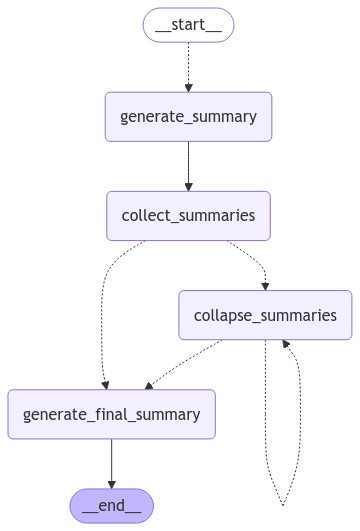

In [49]:
from IPython.display import Image

Image(app.get_graph().draw_mermaid_png())

In [42]:
contents = [doc.page_content for doc in split_documents]

In [50]:
async for step in app.astream(
    {"contents": [doc.page_content for doc in split_documents]},
    {"recursion_limit": 10},
):
    print(list(step.keys()))

Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._achat_with

['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']


ResourceExhausted: 429 Resource has been exhausted (e.g. check quota).